(qr-section)=
# QR decomposition

QR decomposition is another decomposition method that factorises a matrix in the product of two matrices $Q$ and $R$ such that

$$ \begin{align*}
    A = QR,
\end{align*} $$

where $Q$ is an orthogonal matrix and $R$ is an upper triangular matrix.

::::{prf:definition} Orthogonal vectors
:label: orthogonal-vector-definition

A set of vectors $\lbrace \mathbf{v}_1 ,\mathbf{v}_2 ,\mathbf{v}_3 ,\dots \rbrace$ is said to be **orthogonal** if $\mathbf{v}_i \cdot \mathbf{v}_j =0$ for $i\not= j$. Furthermore the set is said to be **orthonormal** if $\mathbf{v}_i$ are all unit vectors.
::::

::::{prf:definition} Orthogonal matrix
:label: orthogonal-matrix-definition

An **orthogonal matrix** is a matrix where the columns are a set of orthonormal vectors. If $A$ is an orthogonal matrix if

$$ \begin{align*}
    A^\mathsf{T} A=I.
\end{align*} $$
::::

For example consider the matrix

$$ \begin{align*}
    A= \begin{pmatrix}
        0.8 & -0.6\\
        0.6 & 0.8
    \end{pmatrix}.
\end{align*} $$

This is an orthogonal matrix since

$$ \begin{align*}
    A^\mathsf{T} A=\begin{pmatrix}
        0.8 & 0.6\\
        -0.6 & 0.8
    \end{pmatrix}
    \begin{pmatrix}
        0.8 & -0.6\\
        0.6 & 0.8
    \end{pmatrix} = 
    \begin{pmatrix}
        1 & 0\\
        0 & 1
    \end{pmatrix}=I.
\end{align*} $$

Futhermore it is an orthonormal matrix since the magnitude of the columns for $A$ are both 1.

(qr-gramschmidt-section)=

## QR decomposition using the Gram-Schmidt process

Consider the $3 \times 3$ matrix $A$ represented as the concatenation of the column vectors $\mathbf{a}_1, \mathbf{a}_2, \mathbf{a}_3$

$$ \begin{pmatrix}
    a_{11} & a_{12} & a_{13} \\
    a_{21} & a_{22} & a_{23} \\
    a_{31} & a_{32} & a_{33}
\end{pmatrix} =
\begin{pmatrix}
    \uparrow & \uparrow & \uparrow \\
    \mathbf{a}_1 & \mathbf{a}_2 & \mathbf{a}_3 \\
    \downarrow & \downarrow & \downarrow
\end{pmatrix} $$

where $\mathbf{a}_i = (a_{1i}, a_{2i}, a_{3i})^\mathsf{T}$. To calculate the orthogonal $Q$ matrix we need a set of vectors $\{\mathbf{q}_1, \mathbf{q}_2, \mathbf{q}_3\}$ that span the same space as \{$\mathbf{a}_1, \mathbf{a}_2, \mathbf{a}_3\}$ but are orthogonal to each other. One way to do this is using the **Gram-Schmidt process**. Consider the diagram shown in {numref}`gram-schmidt-figure` that shows the first two non-orthogonal vectors $\mathbf{a}_1$ and $\mathbf{a}_2$. 

:::{figure} ../Images/gram_schmidt.svg
:name: gram-schmidt-figure
:width: 400

The Gram-Schmidt process
:::

We begin by letting $\mathbf{u}_1 = \mathbf{a}_1$ and seek to find a vector $\mathbf{u}_2$ that is orthogonal to $\mathbf{u}_1$ and in the same span as $\mathbf{a}_2$. To do this we subtract the <a href="https://en.wikipedia.org/wiki/Vector_projection" target="_blank">vector projection</a> of $\mathbf{a}_2$ onto $\mathbf{u}_1$, i.e.,

$$ \mathbf{u}_2 = \mathbf{a}_2 - \left( \frac{\mathbf{a}_2 \cdot \mathbf{u}_1}{\mathbf{u}_1 \cdot \mathbf{u}_1} \right) \mathbf{u}_1.$$

We can simplify things by normalising $\mathbf{u}_1$ such that $\mathbf{q}_1 = \mathbf{u}_1 / |\mathbf{u}_1|$ so we have

$$ \mathbf{u}_2 = \mathbf{a}_2 - (\mathbf{a}_2 \cdot \mathbf{q}_1) \mathbf{q}_1, $$

which is also normalised to give $\mathbf{q}_2 = \mathbf{u}_2 / |\mathbf{u}_2|$. For the next vector $\mathbf{a}_3$ we want the vector $\mathbf{u}_3$ to be orthogonal to both $\mathbf{q}_1$ and $\mathbf{q}_2$ so we subtract both the vector projections of $\mathbf{a}_3$ onto $\mathbf{q}_1$ and $\mathbf{q}_2$

$$ \mathbf{u}_3 = \mathbf{a}_3 - (\mathbf{a}_3 \cdot \mathbf{q}_1) \mathbf{q}_1 - (\mathbf{a}_3 \cdot \mathbf{q}_2) \mathbf{q}_2, $$

which is normalised to give $\mathbf{q}_3$. Rerranging the expressions for $\mathbf{u}_1$, $\mathbf{u}_2$ and $\mathbf{u}_3$ gives

$$ \begin{align*}
    \mathbf{a}_1 &= \mathbf{u}_1, \\
    \mathbf{a}_2 &= (\mathbf{a}_2 \cdot \mathbf{q}_1) \mathbf{q}_1 + \mathbf{u}_2, \\
    \mathbf{a}_3 &= (\mathbf{a}_3 \cdot \mathbf{q}_1) \mathbf{q}_1 + (\mathbf{a}_3 \cdot \mathbf{q}_2)\mathbf{q}_2  + \mathbf{u}_3
\end{align*} $$

and since $\mathbf{u}_i = (\mathbf{a}_i \cdot \mathbf{q}_i) \mathbf{q}_i$ (the projection of $\mathbf{u}_i$ onto a unit vector pointing in the same direction at $\mathbf{u}_i$) then

$$ \begin{align*}
    \mathbf{a}_1 &=  (\mathbf{a}_1 \cdot \mathbf{q}_1) \mathbf{q}_1, \\
    \mathbf{a}_2 &=  (\mathbf{a}_2 \cdot \mathbf{q}_1) \mathbf{q}_1 + (\mathbf{a}_2 \cdot \mathbf{q}_2) \mathbf{q}_2, \\
    \mathbf{a}_3 &= (\mathbf{a}_3 \cdot \mathbf{q}_1) \mathbf{q}_1 + (\mathbf{a}_3 \cdot \mathbf{q}_2) \mathbf{q}_2 + (\mathbf{a}_3 \cdot \mathbf{q}_3) \mathbf{q}_3 
\end{align*} $$

The matrix $A$ can be written as the product of two matrices

$$ \begin{pmatrix}
    \uparrow & \uparrow & \uparrow \\
    \mathbf{a}_1 & \mathbf{a}_2 & \mathbf{a}_3 \\
    \downarrow & \downarrow & \downarrow
\end{pmatrix} = 
\begin{pmatrix}
    \uparrow & \uparrow & \uparrow \\
    \mathbf{q}_1 & \mathbf{q}_2 & \mathbf{q}_3 \\
    \downarrow & \downarrow & \downarrow
\end{pmatrix}
\left( \begin{array}{ccc}
    (\mathbf{q}_1 \cdot \mathbf{a}_1) & (\mathbf{q}_1 \cdot \mathbf{a}_2) & (\mathbf{q}_1 \cdot \mathbf{a}_3) \\
    0 & (\mathbf{q}_2 \cdot \mathbf{a}_2) & (\mathbf{q}_2 \cdot \mathbf{a}_3) \\
    0 & 0 & (\mathbf{q}_3 \cdot \mathbf{a}_3)
\end{array} \right) $$

where the matrix on the left is an orthogonal matrix and the matrix on the right is an upper triangular matrix. Let $Q$ denote the orthonormal matrix and $R$ denote the upper triangular matrix then $A = QR$.

:::{prf:algorithm} QR decomposition using the Gram-Schmidt process
:label: qr-gramschmidt-algorithm

**Inputs:** An $m \times n$ matrix $A$.

**Outputs:** An $m \times n$ orthogonal matrix $Q$ and and $n \times n$ upper triangular matrix $R$ such that $A = QR$.

- $R \gets \mathbf{0}_{n\times n}$
- For $j = 1, \ldots, n$ do
  - For $i = 1, \ldots, j - 1$ do
    - $r_{ij} \gets \mathbf{q}_i \cdot \mathbf{a}_j$
  - $\mathbf{u}_j \gets \mathbf{a}_j - \displaystyle\sum_{i=1}^{j-1} r_{ij} \mathbf{q}_i$
  - $r_{jj} \gets |\mathbf{u}_j|$
  - $\mathbf{q}_j \gets \dfrac{\mathbf{u}_j}{r_{jj}}$
- Return $Q = (\mathbf{q}_1, \mathbf{q}_2, \ldots , \mathbf{q}_n)$ and $R$.
:::

    
::::{prf:example}
:label: qr-gramschmidt-example

Calculate the QR decomposition of the following matrix using the Gram-Schmidt process

$$ \begin{align*}
    A  = \begin{pmatrix}
        -1 & -1 & 1 \\
        1 & 3 & 3 \\
        -1 & -1 & 5 \\
        1 & 3 & 7
    \end{pmatrix}.
\end{align*} $$

:::{dropdown} Solution (click to show)
Column $j=1$:

$$ \begin{align*}
    r_{11} &= |\mathbf{a}_1| = \left| \begin{pmatrix} -1 \\ 1 \\ -1 \\ 1 \end{pmatrix} \right| = 2, \\
    \mathbf{q}_1 &= \frac{\mathbf{a}_1}{r_{11}} = \frac{1}{2} 
    \begin{pmatrix} -1 \\ 1 \\ -1 \\ 1 \end{pmatrix} = 
    \begin{pmatrix} -1/2 \\ 1/2 \\ -1/2 \\ 1/2 \end{pmatrix}.
\end{align*} $$

Column $j = 2$:

$$ \begin{align*}
    r_{12} &= \mathbf{q}_1 \cdot \mathbf{a}_2 = 
    \begin{pmatrix} -1/2 \\ 1/2 \\ -1/2 \\ 1/2 \end{pmatrix} \cdot
    \begin{pmatrix} -1 \\ 3 \\ -1 \\ 3 \end{pmatrix} = 4,\\
    \mathbf{u}_2 &= \mathbf{a}_2 - r_{12} \mathbf{q}_1 = 
    \begin{pmatrix} -1 \\ 3 \\ -1 \\ 3 \end{pmatrix} - 4
    \begin{pmatrix} -1/2 \\ 1/2 \\ -1/2 \\ 1/2 \end{pmatrix} = 
    \begin{pmatrix} 1 \\ 1 \\ 1 \\ 1 \end{pmatrix}, \\
    r_{22} &= |\mathbf{u}_2| = \left| 
        \begin{pmatrix} 1 \\ 1 \\ 1 \\ 1 \end{pmatrix}
    \right| = 2, \\
    \mathbf{q}_2 &= \frac{\mathbf{u}_2}{r_{22}} = \frac{1}{2}
    \begin{pmatrix} 1 \\ 1 \\ 1 \\ 1 \end{pmatrix} = 
    \begin{pmatrix} 1/2 \\ 1/2 \\ 1/2 \\ 1/2 \end{pmatrix}.
\end{align*} $$

Column $j = 3$:

$$ \begin{align*}
    r_{13} &= \mathbf{q}_1 \cdot \mathbf{a}_3 = 
    \begin{pmatrix} -1/2 \\ 1/2 \\ -1/2 \\ 1/2 \end{pmatrix} \cdot
    \begin{pmatrix} 1 \\ 3 \\ 5 \\ 7 \end{pmatrix} = 2, \\
    r_{23} &= \mathbf{q}_2 \cdot \mathbf{a}_3 = 
    \begin{pmatrix} 1/2 \\ 1/2 \\ 1/2 \\ 1/2 \end{pmatrix} \cdot
    \begin{pmatrix} 1 \\ 3 \\ 5 \\ 7 \end{pmatrix} = 8, \\
    \mathbf{u}_3 &= \mathbf{a}_3 - r_{13} \mathbf{q}_1 - r_{23} \mathbf{q}_2 = 
    \begin{pmatrix} 1 \\ 3 \\ 5 \\ 7 \end{pmatrix} - 2
    \begin{pmatrix} -1/2 \\ 1/2 \\ -1/2 \\ 1/2 \end{pmatrix} - 8
    \begin{pmatrix} 1/2 \\ 1/2 \\ 1/2 \\ 1/2 \end{pmatrix} = 
    \begin{pmatrix} -2 \\ -2 \\ 2 \\ 2 \end{pmatrix}, \\
    r_{33} &= | \mathbf{u}_3 | = \left|
        \begin{pmatrix} -2 \\ -2 \\ 2 \\ 2 \end{pmatrix}
    \right| = 4, \\
    \mathbf{q}_3 &= \frac{\mathbf{u}_3}{r_{33}} = \frac{1}{4}
    \begin{pmatrix} -2 \\ -2 \\ 2 \\ 2 \end{pmatrix} = 
    \begin{pmatrix} -1/2 \\ -1/2 \\ 1/2 \\ 1/2 \end{pmatrix}
\end{align*} $$

Therefore

$$ \begin{align*}
    Q &= 
    \begin{pmatrix}
        -1/2 & 1/2 & -1/2 \\ 
        1/2 & 1/2 & -1/2 \\
        -1/2 & 1/2 & 1/2 \\
        1/2 & 1/2& 1/2
    \end{pmatrix}, &
    R &= 
    \begin{pmatrix}
        2 & 4 & 2 \\ 
        0 & 2 & 8 \\
        0 & 0 & 4
    \end{pmatrix}.
\end{align*} $$
:::
::::

### Code

The code below defines a function called `qrgs()` which calculates the QR decomposition of a matrix `A` using the Gram-Schmidt process.

:::::{tab-set}
::::{tab-item} Python
```python
def qrgs(A):
    n = A.shape[1]
    Q, R = np.zeros(A.shape), np.zeros((n,n))
    for j in range(n):
        sum_ = 0
        for i in range(j):
            R[i,j] = np.dot(Q[:,i], A[:,j])
            sum_ += R[i,j] * Q[:,i]

        u = A[:,j] - sum_
        R[j,j] = np.linalg.norm(u)
        Q[:,j] = u / R[j,j]
    
    return Q, R
```

The Numpy command `np.linalg.norm()` calculates the magnitude of a vector.
::::

::::{tab-item} MATLAB
```matlab
function [Q, R] = qrgs(A)

n = size(A, 2);
Q = zeros(size(A));
R = zeros(n);
for j = 1 : n
    sum_ = 0;
    for i = 1 : j - 1
        R(i,j) = dot(Q(:,i), A(:,j));
        sum_ = sum_ + R(i,j) * Q(:,i);
    end
    u = A(:,j) - sum_;
    R(j,j) = norm(u);
    Q(:,j) = u / R(j,j);
end

end
```
::::
:::::

In [11]:
import numpy as np

def qrgs(A):
    n = A.shape[1]
    Q, R = np.zeros(A.shape), np.zeros((n,n))
    for j in range(n):
        sum_ = 0
        for i in range(j):
            R[i,j] = np.dot(Q[:,i], A[:,j])
            sum_ += R[i,j] * Q[:,i]

        u = A[:,j] - sum_
        R[j,j] = np.linalg.norm(u)
        Q[:,j] = u / R[j,j]
    
    return Q, R


# Define matrix
A = np.array([[-1, -1, 1], 
              [1, 3, 3], 
              [-1, -1, 5], 
              [1, 3, 7]])

# Calculate QR decomposition
Q, R = qrgs(A)
print(f"Q = \n{Q}\n\nR = \n{R}")

Q = 
[[-0.5  0.5 -0.5]
 [ 0.5  0.5 -0.5]
 [-0.5  0.5  0.5]
 [ 0.5  0.5  0.5]]

R = 
[[2. 4. 2.]
 [0. 2. 8.]
 [0. 0. 4.]]


(qr-householder-section)=
## QR decomposition using Householder transformations

Another method we can use to calculate the QR decomposition of a matrix is by the use of **Householder transformations**. Consider the diagram in {numref}`householder-1-figure` where the vector $\mathbf{x}$ is reflected about the hyperplane represented by the dashed line so that it is parallel to the basis vector $\mathbf{e}_1 = (1, 0, \ldots, 0)^\mathsf{T}$.

:::{figure} ../Images/householder_1.svg
:name: householder-1-figure
:width: 250

Householder transformation: the vector $\mathbf{x}$ is reflected about the dashed line so that it is parallel to the basis vector $\mathbf{e}_1$.
:::

The Householder matrix is an orthogonal matrix that performs the Householder transformation reflection 

:::{prf:definition} Householder matrix

$$ H = I - 2 \mathbf{v} \mathbf{v}^\mathsf{T}, $$(householder-equation)

where

$$ \begin{align*}
    \mathbf{u} &= \mathbf{x} - |\mathbf{x}| \mathbf{e}_1, \\
    \mathbf{v} &= \frac{\mathbf{u}}{| \mathbf{u} |}.
\end{align*} $$
:::

If $\mathbf{x}$ is nearly parallel to $\mathbf{e}_1$ then the denominator in equation {eq}`householder-equation` is close to zero and computational rounding errors can occur. However, we can choose to reflect $\mathbf{x}$ so that it is parallel to $-\mathbf{e}_1$ instead.

:::{figure} ../Images/householder_2.svg
:name: householder-2-figure
:width: 350

Householder transformation: the vector $\mathbf{x}$ is reflected about the dashed line so that it is parallel to the basis vector $-\mathbf{e}_1$ to avoid computational rounding errors.
:::

In {numref}`householder-2-figure` above, $\mathbf{x}$ is to be transformed to $-|\mathbf{x}|\mathbf{e}_1$ then

$$ \begin{align*}
    \mathbf{u} = \mathbf{x} + |\mathbf{x}| \mathbf{e}_1,
\end{align*} $$

so in order to always reflect in the direction that gives the largest value of $|\mathbf{u}|$ we use

$$ \begin{align*}
    \mathbf{u} = \mathbf{x} + \operatorname{sign}(x)|\mathbf{x}|\mathbf{e}_1 
\end{align*} $$

where 

$$ \begin{align*}
    \operatorname{sign}(x) = \begin{cases}
        1, & x \geq 0,\\
        -1, & x < 0.
    \end{cases}
\end{align*} $$


To calculate the QR decomposition of an $m \times n$ matrix $A$ we let $Q = I_m$ and $R = A = (\mathbf{r}_1, \mathbf{r}_2, \ldots , \mathbf{r}_n)$ and use Householder transformations to transform each of the column vectors $\mathbf{r}_1$ so that they are parallel to the basis vector $\mathbf{e}_j$. To do this we first calculate $\mathbf{v}$ using

$$ \begin{align*}
    \mathbf{u}_1 &= \mathbf{r}_1 + \operatorname{sign}(r_{11})| \mathbf{r}_1 |\mathbf{e}_1 , \\
    \mathbf{v}_1 &= \frac{\mathbf{u}_1}{| \mathbf{u}_1 |},
\end{align*} $$

and then we calculate the Householder matrix $H$ using equation {eq}`householder-equation`

$$ \begin{align*}
    H_1 &= I_m - 2 \mathbf{v}_1 \mathbf{v}_1^\mathsf{T},
\end{align*} $$

and apply the Householder transformation to $Q$ and $R$

$$ \begin{align*}
    Q &= QH_1, \\
    R &= H_1 R =
    \begin{pmatrix}
        r_{11} & r_{12}  & \cdots  & r_{1n} \\
        0 & r_{22} & \cdots & r_{2n} \\
        \vdots & \vdots & \ddots & \vdots \\
        0 & r_{n2} & \cdots & r_{nn}
    \end{pmatrix}.
\end{align*} $$

The first column of $R$, $\mathbf{r}_1$, is now parallel to $\mathbf{e}_1$. We now need to transform the second column of $R$, $\mathbf{r}_2$, without changing the first row and column so that it is parallel to the second basis vector $\mathbf{e}_2$. So we set the first element of $\mathbf{r}_2$ to zero and calculate the Householder matrix

$$ \mathbf{r}_2 = \begin{pmatrix} 0 \\ r_{22} \\ \vdots \\ r_{n2} \end{pmatrix}$$

We repeat this process for the columns in $R$ at which point $R$ is an upper triangular matrix. The $Q$ matrix is the product of all of the individual Householder transformations so by definition it is an orthogonal matrix.

:::{prf:algorithm} QR decomposition using Householder transformations
:label: qr-householder-algorithm

**Inputs:** An $m \times n$ matrix $A$.

**Outputs:** An $m \times m$ orthogonal matrix $Q$ and and $m \times n$ upper triangular matrix $R$ such that $A = QR$.

- $Q \gets I_m$ and $R \gets A$
- For $j = 1, \ldots, n$ do
  - $\mathbf{u} \gets$ column $j$ of $R$ with the first $j-1$ elements set to zero
  - $\mathbf{u} \gets \mathbf{u} + \operatorname{sign}(r_{jj})|\mathbf{u}|\mathbf{e}_j$ &emsp; ($\mathbf{e}_j$ is column $j$ of the identity matrix)
  - $\mathbf{v} \gets \dfrac{\mathbf{u}}{| \mathbf{u} |}$
  - $H \gets I_m - 2 \mathbf{v} \mathbf{v} ^\mathsf{T}$
  - $Q \gets Q H$
  - $R \gets H R$
:::

::::{prf:example}
:label: qr-householder-example

Calculate the QR decomposition of the following matrix using the Householder transformations

$$ \begin{align*}
    A=\begin{pmatrix}
        1 & -4 \\ 
        2 & 3 \\
        2 & 2
     \end{pmatrix}
\end{align*} $$

:::{dropdown} Solution (click to show)
Let $Q=I_3$ and $R=A$ and calculate Householder matrix for the first column of $R$

Column $j = 1$: calculate the Householder matrix

$$ \begin{align*}
    \mathbf{u} &= \mathbf{r}_1 + \operatorname{sign}(r_{11})|\mathbf{r}_1|\mathbf{e}_1
    = \begin{pmatrix} 1 \\ 2 \\ 2 \end{pmatrix} + 3 
    \begin{pmatrix} 1 \\ 0 \\ 0 \end{pmatrix}
    = \begin{pmatrix} 4 \\ 2 \\ 2 \end{pmatrix}, \\
    \mathbf{v} &= \frac{\mathbf{u}}{|\mathbf{u}|} 
    = \frac{1}{2\sqrt{6}} \begin{pmatrix} 4 \\ 2 \\ 2 \end{pmatrix}
    = \frac{\sqrt{6}}{6} \begin{pmatrix} 2 \\ 1 \\ 1 \end{pmatrix}, \\
    H &= I - 2 \mathbf{v} \mathbf{v}^\mathsf{T} 
    = 
    \begin{pmatrix}
        1 & 0 & 0 \\
        0 & 1 & 0 \\
        0 & 0 & 1
    \end{pmatrix} - \frac{1}{3}
    \begin{pmatrix}
        4 & 2 & 2 \\
        2 & 1 & 1 \\
        2 & 1 & 1
    \end{pmatrix} \\
    &= \frac{1}{3}
    \begin{pmatrix}
        -1 & -2 & -2 \\
        -2 & 2 & -1 \\
        -2 & -1 & 2
    \end{pmatrix}.
\end{align*} $$

Apply Householder transformations to $Q$ and $R$

$$ \begin{align*}
    Q &= QH = 
    \begin{pmatrix}
        1 & 0 & 0 \\
        0 & 1 & 0 \\
        0 & 0 & 1
    \end{pmatrix} \frac{1}{3}
    \begin{pmatrix}
        -1 & -2 & -2 \\
        -2 & 2 & -1 \\
        -2 & -1 & 2
    \end{pmatrix} = \frac{1}{3}
    \begin{pmatrix}
        -1 & -2 & -2 \\
        -2 & 2 & -1 \\
        -2 & -1 & 2
    \end{pmatrix}, \\
    R &= HR = \frac{1}{3}
    \begin{pmatrix}
        -1 & -2 & -2 \\
        -2 & 2 & -1 \\
        -2 & -1 & 2
    \end{pmatrix}
    \begin{pmatrix}
        1 & -4 \\ 
        2 & 3 \\
        2 & 2
     \end{pmatrix} =
     \begin{pmatrix}
        -3 & -2 \\
        0 & 4 \\
        0 & 3 
    \end{pmatrix}.
\end{align*} $$

Column $j = 2$: calculate Householder matrix

$$ \begin{align*}
    \mathbf{u} &= \mathbf{r}_2 + \operatorname{sign}(r_{22})|\mathbf{r}_2|\mathbf{e}_2
    = \begin{pmatrix}  0 \\ 4 \\ 3 \end{pmatrix} + 5 
    \begin{pmatrix} 0 \\ 1 \\ 0 \end{pmatrix}
    = \begin{pmatrix} 0 \\ 9 \\ 3 \end{pmatrix} , \\
    \mathbf{v} &= \frac{\mathbf{u}}{|\mathbf{u}|} 
    = \frac{1}{3\sqrt{10}} \begin{pmatrix} 0 \\ 9 \\ 3 \end{pmatrix} 
    = \frac{\sqrt{10}}{10} \begin{pmatrix} 0 \\ 3 \\ 1 \end{pmatrix}, \\
    H &= I - 2 \mathbf{v} \mathbf{v}^\mathsf{T} 
    = 
    \begin{pmatrix} 1 & 0 & 0 \\ 0 & 1 & 0 \\ 0 & 0 & 1 \end{pmatrix}
     - \frac{1}{5} 
    \begin{pmatrix} 0 & 0 & 0 \\ 0 & 9 & 3 \\ 0 & 3 & 1 \end{pmatrix} \\
    &= \frac{1}{5}
    \begin{pmatrix}
        5 & 0 & 0 \\
        0 & -4 & -3 \\
        0 & -3 & 4
    \end{pmatrix}. \\
\end{align*} $$

Applying the Householder transformations to $Q$ and $R$

$$ \begin{align*}
    Q = Q H &= \frac{1}{3}
    \begin{pmatrix}
        -1 & -2 & -2 \\
        -2 & 2 & -1 \\
        -2 & -1 & 2
    \end{pmatrix}
    \frac{1}{5}  
    \begin{pmatrix}
        5 & 0 & 0 \\
        0 & -4 & -3 \\
        0 & -3 & 4
    \end{pmatrix} \\
    &= \frac{1}{15}
    \begin{pmatrix}
        -5 & 14 & -2 \\
        -10 & -5 & -10 \\
        -10 & -2 & 11
    \end{pmatrix}, \\
    R = HR &= \frac{1}{5}  
    \begin{pmatrix}
        5 & 0 & 0 \\
        0 & -4 & -3 \\
        0 & -3 & 4
    \end{pmatrix}
    \begin{pmatrix}
        -3 & -2 \\
        0 & 4 \\
        0 & 3 
    \end{pmatrix} = 
    \begin{pmatrix}
        -3 & -2 \\
        0 & -5 \\
        0 & 0 
    \end{pmatrix}.
\end{align*} $$ 
:::
::::

### Code

The code below defines a function called `qrhh()` that calculates the QR decomposition of an $m \times n$ matrix $A$ using Householder transformations. This has been used to calculate the QR decomposition of the matrix from {prf:ref}`qr-householder-example`.

:::::{tab-set}
::::{tab-item} Python
```python
def qrhh(A):
    m, n = A.shape
    I = np.eye(m)
    Q, R = np.eye(m), np.copy(A)
    for j in range(n):
        u = R[:,[j]]
        u[:j] = 0
        u = u + np.sign(R[j,j]) * np.linalg.norm(u) * I[:,[j]]
        v = u / np.linalg.norm(u)
        H = I - 2 * np.dot(v, v.T)
        R = np.dot(H, R)
        Q = np.dot(Q, H)
    
    return Q, R
```

The NumPy command `np.matmul(A, B)` calculates the matrix multiplication of two matrices `A` and `B`. 
<!-- Note that here we used `np.matmul(v.T, v)` for calculating $\mathbf{v} \mathbf{v}^\mathsf{T}$ (i.e., `v` and `v.T` are the other way around) because NumPy column vectors are treated as row vectors. -->
::::

::::{tab-item} MATLAB
```matlab
function [Q, R] = qrhh(A)

[m, n] = size(A);
I = eye(m);
Q = I;
R = A;
for j = 1 : n
    u = R(:,j);
    u(1:j-1) = 0;
    u = u + sign(R(j,j)) * norm(u) * I(:,j);
    v = u / norm(u);
    H = I - 2 * v * v';
    Q = Q * H;
    R = H * R;
end

end
```
::::
:::::

In [58]:
import numpy as np

def qrhh(A):
    m, n = A.shape
    I = np.eye(m)
    Q, R = np.eye(m), A
    for j in range(n):
        u = R[:,[j]]
        u[:j] = 0
        u = u + np.sign(R[j,j]) * np.linalg.norm(u) * I[:,[j]]
        v = u / np.linalg.norm(u)
        H = I - 2 * np.dot(v, v.T)
        R = np.dot(H, R)
        Q = np.dot(Q, H)
    
    return Q, R


# Define matrix
A = np.array([[1, -4],
              [2, 3],
              [2, 2]])

# Calculate QR decomposition
Q, R = qrhh(A)
print(f"Q = \n{Q}\n\nR = \n{R}")

Q = 
[[-0.33333333  0.93333333 -0.13333333]
 [-0.66666667 -0.33333333 -0.66666667]
 [-0.66666667 -0.13333333  0.73333333]]

R = 
[[-3.00000000e+00 -2.00000000e+00]
 [ 9.32587341e-16 -5.00000000e+00]
 [-1.33226763e-16  2.22044605e-16]]


## Orthogonality errors

As with all numerical techniques, the two QR decomposition methods shown here are prone to computational rounding errors, especially since they both use square root calculations. The matrix $Q$ is orthogonal so the dot product of each column of $Q$ with all other columns should be equal to zero. We can use this to check the **loss of orthogonality** in our results. 

Defining an orthogonality error $E_j$ for a column vector $\mathbf{q}_j$ from $Q$ such that

$$ \begin{align*}
    E_j =\max_{i} |\mathbf{q}_j \cdot \mathbf{q}_i |, \qquad i = 1 ,\ldots ,j-1,
\end{align*} $$

then non-zero values of $E_j$ indicates that we have lost some orthogonality due to computational rounding errors. The orthogonality errors have been calculated for the QR decomposition of a random $50\times 50$ matrix using the Gram-Schmidt process and Householder transformations and plotted below. Note that as the column number increases, the orthogonality error for the QR decomposition using the Gram-Schmidt process increases whereas the Householder transformation stays constant.

:::{glue:figure} orthogonality_error
:figwidth: 600
:::

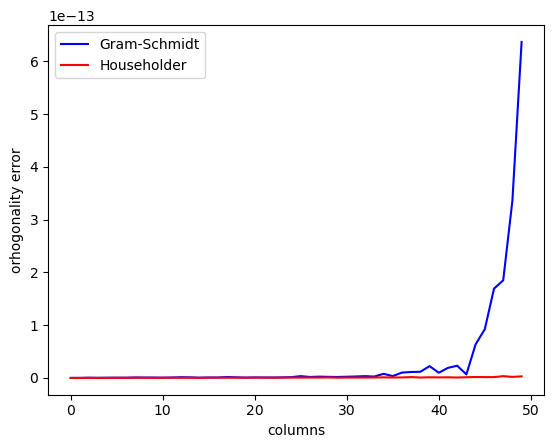

In [60]:
import matplotlib.pyplot as plt
from myst_nb import glue

n = 50
np.random.seed(1)
A = np.random.rand(n, n)
Qgs, Rgs = qrgs(A)
Qhh, Rhh = qrhh(A)
errorhh, errorgs = np.zeros(n), np.zeros(n)

for i in range(n):
    for j in range (i - 1):
        errorgs[i] = max(errorgs[i], abs(np.dot(Qgs[:,i], Qgs[:,j])))
        errorhh[i] = max(errorhh[i], abs(np.dot(Qhh[:,i], Qgs[:,j])))



fig, ax = plt.subplots()
plt.plot(errorgs, "b-", label="Gram-Schmidt")
plt.plot(errorhh, "r-", label="Householder")
plt.xlabel("columns")
plt.ylabel("orhogonality error")
plt.legend()
plt.show()

glue("orthogonality_error", fig, display=False)